In [18]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import os

# === USER SETTINGS ===
client = Client("IRIS")

# Station metadata
network = "XH"
station = "DR02"
location = "--"     # Use "--" for blank location
channel = "HHZ"     # Or HHN, HHE, etc.

# Date settings
year = 2016
start_julian_day = 43   # Example: day 001

# Folder to save SAC files
folder_path = "/Volumes/CATALOGDR04/DATA/DR01/Py"
os.makedirs(folder_path, exist_ok=True)

# === LOOP OVER DAYS ===
#for jday in range(start_julian_day, start_julian_day + 1):

#    # Convert Julian day to UTCDateTime
#    starttime = UTCDateTime(year, 1, 1) + (jday - 1) * 86400
#    endtime = starttime + 86400

# === LOOP OVER DAYS ===
for jday in range(43, 44):  # 1 Jan 2016 to 31 Mar 2016 = 92 is exclusive, so this runs 1 to 91 inclusive (91 days total)

    # Convert Julian day to UTCDateTime
    starttime = UTCDateTime(year, 1, 1) + (jday - 1) * 86400
    endtime = starttime + 86400

    print(f"Processing {starttime.date}")

    try:
        # Fetch waveform
        st = client.get_waveforms(network=network,
                                  station=station,
                                  location=location,
                                  channel=channel,
                                  starttime=starttime,
                                  endtime=endtime)

        # Fetch metadata
        inventory = client.get_stations(network=network,
                                        station=station,
                                        location=location,
                                        channel=channel,
                                        starttime=starttime,
                                        endtime=endtime,
                                        level="response")
        st.attach_response(inventory)

        # Format Julian day string
        julian_str = f"{jday:03d}"

        # Save each trace
        for tr in st:
            filename = f"{station}_{tr.stats.channel}_{location}_{year}_{julian_str}.sac"
            filepath = os.path.join(folder_path, filename)

            # Optional: remove instrument response
            # tr.remove_response(output="VEL")

            tr.write(filepath, format="SAC")
            print(f"Saved {filepath}")

    except Exception as e:
        print(f"No data for {starttime.date}: {e}")


Processing 2016-02-12
Saved /Volumes/CATALOGDR04/DATA/DR01/Py/DR02_HHZ_--_2016_043.sac


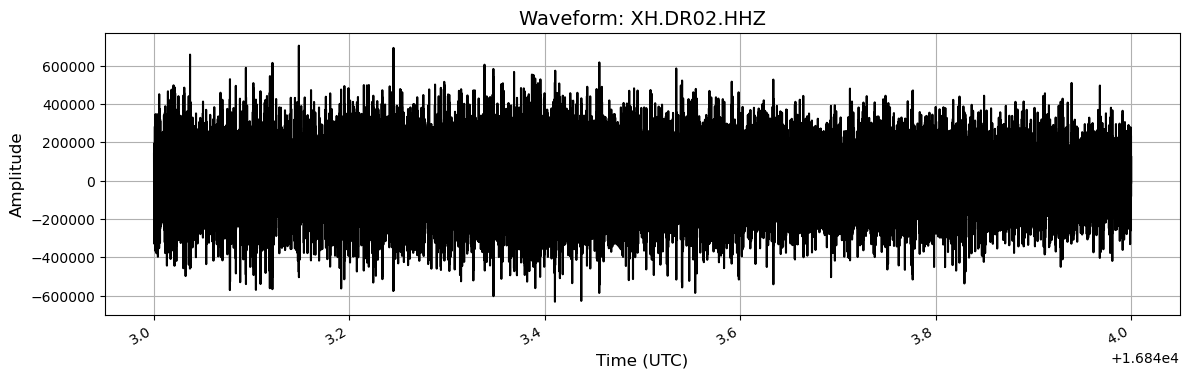

In [19]:
from obspy import read
import os
import matplotlib.pyplot as plt

# === USER SETTINGS ===
folder_path = "/Volumes/CATALOGDR04/DATA/DR01/Py"
filename = "DR02_HHZ_--_2016_043.sac"  # Example file

# Full path to SAC file
file_path = os.path.join(folder_path, filename)

# === LOAD SAC FILE ===
st = read(file_path)
tr = st[0]  # Assuming one trace in file

# === PRINT ALL SAC HEADERS ===
#print("\n=== SAC HEADERS ===")
#for key, value in tr.stats.sac.items():
#    print(f"{key}: {value}")

# === PLOT WAVEFORM ===
plt.figure(figsize=(12, 4))
plt.plot(tr.times("matplotlib"), tr.data, color='black')
plt.title(f"Waveform: {tr.stats.network}.{tr.stats.station}.{tr.stats.channel}", fontsize=14)
plt.xlabel("Time (UTC)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid(True)
plt.tight_layout()

# Use datetime x-axis
plt.gcf().autofmt_xdate()

plt.show()


In [ ]:
from obspy import read
import os
import matplotlib.pyplot as plt

# === USER SETTINGS ===
folder_path = "/Volumes/CATALOGDR04/DATA/DR01/Py"
station = "DR01"
channel = "HHZ"
location = "--"
year = 2016

# === BUILD FILE LIST FOR JAN 1 TO MAR 31 (Julian 001–091) ===
stream = None

for jday in range(1, 92):  # 001 to 091 inclusive
    julian_str = f"{jday:03d}"
    filename = f"{station}_{channel}_{location}_{year}_{julian_str}.sac"
    file_path = os.path.join(folder_path, filename)

    if os.path.exists(file_path):
        st = read(file_path)
        if stream is None:
            stream = st
        else:
            stream += st
        print(f"Loaded {filename}")
    else:
        print(f"Missing {filename}, skipping...")

# === CHECK IF ANY DATA WAS LOADED ===
if stream is None:
    raise FileNotFoundError("No SAC files were found for the specified date range.")

# === MERGE STREAM INTO ONE CONTINUOUS TRACE ===
stream.merge(method=1, fill_value='interpolate')  # Fill small gaps

# === PLOT WAVEFORM ===
plt.figure(figsize=(15, 5))
for tr in stream:
    plt.plot(tr.times("matplotlib"), tr.data, color='black')

plt.title(f"Waveform: {station} {channel} from Jan 1 to Mar 31, 2016", fontsize=14)
plt.xlabel("Time (UTC)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.gcf().autofmt_xdate()  # Beautify date labels

plt.show()


Loaded DR01_HHZ_--_2016_001.sac
Loaded DR01_HHZ_--_2016_002.sac
Loaded DR01_HHZ_--_2016_003.sac
Loaded DR01_HHZ_--_2016_004.sac
Loaded DR01_HHZ_--_2016_005.sac
Loaded DR01_HHZ_--_2016_006.sac
Loaded DR01_HHZ_--_2016_007.sac
Loaded DR01_HHZ_--_2016_008.sac
Loaded DR01_HHZ_--_2016_009.sac
Loaded DR01_HHZ_--_2016_010.sac
Loaded DR01_HHZ_--_2016_011.sac
Loaded DR01_HHZ_--_2016_012.sac
Loaded DR01_HHZ_--_2016_013.sac
Loaded DR01_HHZ_--_2016_014.sac
Loaded DR01_HHZ_--_2016_015.sac
